In [1]:
# import neccessary tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import os
import requests

%matplotlib inline

In [2]:
    # import envs
    
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
    # get alpaca keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
    # creating alpaca api object
    
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [5]:
    # set api keys

api_key = os.getenv("ALPACA_API_KEY", "ALPACA_SECRET_KEY")

## Collect Crypto Prices 

In [6]:
# creating variables for crypto currencies

my_btc = 1.2
my_eth = 5.3

In [7]:
    # get url for btc

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

In [8]:
    # request info from url for json

btc_response = requests.get(btc_url).json()

In [9]:
    # get the price in CAD from json file

btc_response['data']['1']['quotes']['CAD']['price']

44930.9575

In [10]:
    # get url for eth
    
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [11]:
    # request info from url for json file

eth_response = requests.get(eth_url).json()

In [12]:
    #  get the price in CAD from json file
    
eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

2843.46777

## Investment Data SPY & AGG

In [13]:
# create variables for SPY stocks and AGG bonds

my_agg = 200
my_spy = 50

In [14]:
# Set timeframe to '1D'

timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.

start_date = pd.Timestamp("2016-06-09", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-09", tz="America/New_York").isoformat()

# Set the ticker information

tickers = ["AGG", "SPY"]

# Get 5 year's worth of historical price data

investment_data_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data

investment_data_ticker.tail()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2021-06-03 00:00:00-04:00  114.31  114.46  114.21  114.210  3270096.0  417.87   
2021-06-04 00:00:00-04:00  114.39  114.67  114.22  114.665  4334878.0  420.75   
2021-06-07 00:00:00-04:00  113.97  114.64  113.97  114.595  3639918.0  422.59   
2021-06-08 00:00:00-04:00  114.84  114.87  114.78  114.820  3951702.0  423.11   
2021-06-09 00:00:00-04:00  115.43  115.43  114.97  115.050  3418086.0  423.18   

                                                                 
                             high       low   close      volume  
time                                                             
2021-06-03 00:00:00-04:00  419.99  416.2800  418.86  51582905.0  
2021-06-04 00:00:00-04:00  422.92  418.8422  422.57  45129316.0  
2021-06-07 00:00:00-04:00  422.78  421.1900  422.23  41442963.0  
2021-06-08 00:00:00-04:00  423.21  420.3200  422.27  40131441.0  
2021-06-09 00:00:00-04:00  423.26  421.4100  421.62  38368598.0

In [15]:
# Create and empty DataFrame for closing prices

data_ticker= pd.DataFrame()

# Fetch the closing prices for all the tickers

for ticker in tickers:
    data_ticker[ticker] = investment_data_ticker[ticker]["close"]

# Drop the time component of the date

data_ticker.index = investment_data_ticker.index.date

# Display sample data
data_ticker.head()

,AGG,SPY
2017-06-19,109.790,NaN
2017-06-20,109.975,243.04
2017-06-21,109.980,242.95
2017-06-22,110.050,242.83
2017-06-23,110.070,243.16


In [16]:
    # calculate closing sum

closing_AGG = data_ticker["AGG"].sum()
closing_SPY = data_ticker["SPY"].sum()

In [17]:
    # round sum to two decinal places

closing_AGG.round(2)

111380.94

In [18]:
    # round sum to two decimal places

closing_SPY.round(2)

301017.25

## Savings Health Analasys.

In [19]:
# creating monthly income variable

monthly_income = 12000

In [34]:
# calculate sum of crypto and shares

crypto_sum = (btc_response['data']['1']['quotes']['CAD']['price'])+(eth_response["data"]["1027"]["quotes"]["CAD"]["price"])
crypto_sum


47774.42527

In [21]:
shares_sum = (closing_AGG.round(2))+(closing_SPY.round(2))
shares_sum

412398.19

In [35]:
# initialise data of lists.
data = {"Amount":["47774.42527", "412398.19"]
        }
  
# Creates pandas DataFrame.
df_savings = pd.DataFrame(data, index =["crypto",
                               "shares"])
  
# print the data
df_savings

,Amount
crypto,47774.42527
shares,412398.19


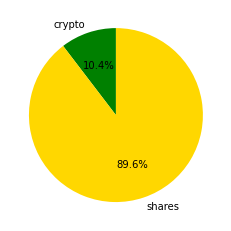

In [36]:
# plotting a pie chart

import matplotlib.pyplot as plt
import numpy as np

labels = df_savings.index
colors = [ "green", "gold"]
plt.pie(df_savings["Amount"], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [24]:
# create conditional statements for emergency fund

emergency_fund = 36000

In [25]:
# print conditional statements

crypto_savings = 48305.173345
shares_savings = 412398.19

a = 200
b = 33
if crypto_savings > emergency_fund:
  print(" congratulations you have enough money in this fund")
elif emergeycy_fund == crypto_savings:
  print("congratulations you have reached your financial goals")
else:
  print("you are almost at yor financial goal you only need")

 congratulations you have enough money in this fund


## Monte Carlo Simulation

In [26]:
# Configure a Monte Carlo simulation to forecast thirty years cumulative returns

MC_even_dist = MCSimulation(
    portfolio_data = investment_data_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-06-19 00:00:00-04:00  109.87  109.9000  109.74  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.0300  109.80  109.975  2010628.0   
2017-06-21 00:00:00-04:00  109.88  110.0400  109.88  109.980  1085301.0   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.95  110.050  1295361.0   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.98  110.070  1101304.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-06-19 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-06-20 00:00:00-04:00     0.001685  244.25  244.26  242.99  243.04   
2017-06-21 00:00:00-04:00     0.000045  243.43  243.59  242.41  242.95   
2017-06-22 00:00:00-04:00     0.000636  242.97  243.53  242.64  242.83   
2017-06-23 00:00:00-04:00     0.000182  242.91  243.51  242.47  243.16   

                                                    
                               volume daily_return  
time                                                
2017-06-19 00:00:00-04:00         NaN          NaN  
2017-06-20 00:00:00-04:00  39203167.0          NaN  
2017-06-21 00:00:00-04:00  42746920.0    -0.000370  
2017-06-22 00:00:00-04:00  32991335.0    -0.000494  
2017-06-23 00:00:00-04:00  45792641.0     0.001359

# Plot the simulation results

In [27]:
# Run a Monte Carlo simulation to forecast thirty years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010978,1.003614,1.000638,0.998288,1.004246,1.001563,1.001115,0.999818,0.999431,0.980962,...,1.001883,0.989875,1.002105,1.007004,1.000548,1.004251,0.988902,0.992117,0.997870,0.996746
2,1.025725,1.002205,0.996579,0.997482,1.017879,1.004717,1.003848,0.997753,0.996304,0.990121,...,1.005373,0.995359,1.009243,1.019818,1.015390,1.002609,0.992662,0.992239,0.999024,0.996890
3,1.030872,0.995350,1.003051,1.016049,1.010218,0.992117,0.996905,1.006968,0.985365,0.995720,...,1.005813,0.987725,1.019187,1.013422,1.018925,0.996405,0.982036,0.983637,1.006667,0.996267
4,1.027024,0.979162,1.013229,1.007632,1.010302,0.983912,0.991152,1.011075,0.991498,0.997757,...,1.005302,0.997392,1.008682,1.028955,1.018101,0.993881,0.977943,0.998883,1.014472,0.992311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27.274204,8.257110,31.223211,4.956842,49.298256,11.076227,10.082009,26.875799,13.416607,21.384670,...,32.747882,19.174575,8.829051,20.024109,12.333667,10.448381,26.673408,16.853250,19.215634,49.446504
7557,27.044112,8.181217,31.118865,4.957089,49.918068,11.057464,10.097914,26.877052,13.262952,21.644214,...,32.398151,19.341795,8.687848,19.789837,12.121144,10.383958,26.841062,16.801160,19.301379,49.806148
7558,26.881582,8.143964,30.723039,4.929251,49.298418,11.048400,10.257222,26.821711,13.153780,21.549785,...,32.337414,19.167537,8.636570,19.469027,12.142699,10.391870,26.672220,16.839812,19.038174,50.178310
7559,26.599418,8.122694,30.622624,4.954160,48.982376,11.100994,10.253277,27.213003,13.316851,21.650761,...,32.479090,19.247424,8.500808,19.519289,12.201157,10.568907,26.818863,16.872962,19.149505,50.443543


# Visualizing results by ploting

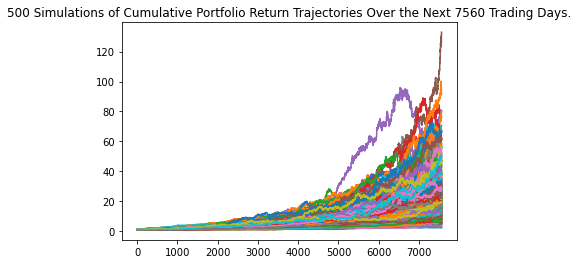

In [28]:
    # plot of thirty year simulations

line_plot = MC_even_dist.plot_simulation() 

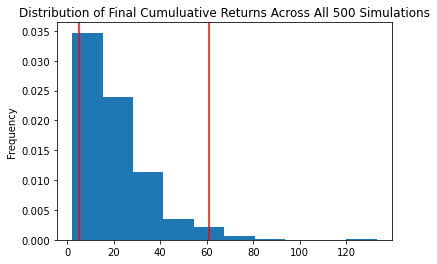

In [29]:
    # Plot probability distribution and confidence intervals

dist_plot = MC_even_dist.plot_distribution()  

## Retirement analasys

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             21.009017
std              15.115332
min               2.098170
25%              10.515046
50%              16.639426
75%              27.167896
max             132.993267
95% CI Lower      4.916300
95% CI Upper     60.817266
Name: 7560, dtype: float64


# Determine upper and lower confidence intervals 

In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*20000,2)
even_ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $98325.99 and $1216345.31.


In [32]:
# Determine intervals with 50% increase on initial investment
even_ci_lower = round(even_tbl[8]*30000,2)
even_ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 30 years will end within in the range of $147488.99 and $1824517.97.
